In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #  for avoid unwanted warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(16,8)})

In [2]:
dataset=pd.read_csv('elantra.csv')

In [3]:
dataset.head()

,Month,Year,ElantraSales,Unemployment,Queries,CPI_energy,CPI_all
0,1,2010,7690,9.7,153,213.377,217.466
1,1,2011,9659,9.1,259,229.353,221.082
2,1,2012,10900,8.2,354,244.178,227.666
3,1,2013,12174,7.9,230,242.560,231.321
4,1,2014,15326,6.6,232,247.575,234.933


In [4]:
dataset.shape

(50, 7)

In [5]:
dataset.columns

Index(['Month', 'Year', 'ElantraSales', 'Unemployment', 'Queries',
       'CPI_energy', 'CPI_all'],
      dtype='object')

In [6]:
dataset.isnull().sum()

Month           0
Year            0
ElantraSales    0
Unemployment    0
Queries         0
CPI_energy      0
CPI_all         0
dtype: int64

In [7]:
y=dataset['ElantraSales']
y=pd.DataFrame(y)

In [8]:
x=dataset.drop(columns=['ElantraSales'])
x=pd.DataFrame(x)

array([[<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Queries'}>],
       [<AxesSubplot:title={'center':'CPI_energy'}>,
        <AxesSubplot:title={'center':'CPI_all'}>]], dtype=object)

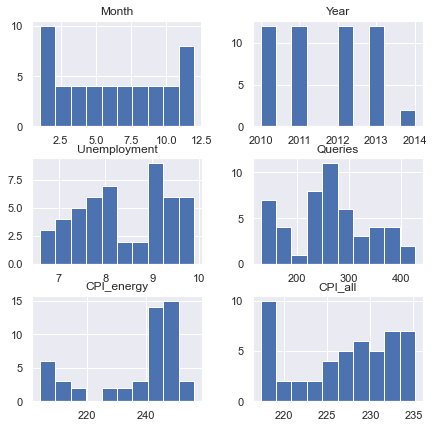

In [9]:
x.hist(figsize=(7,7))

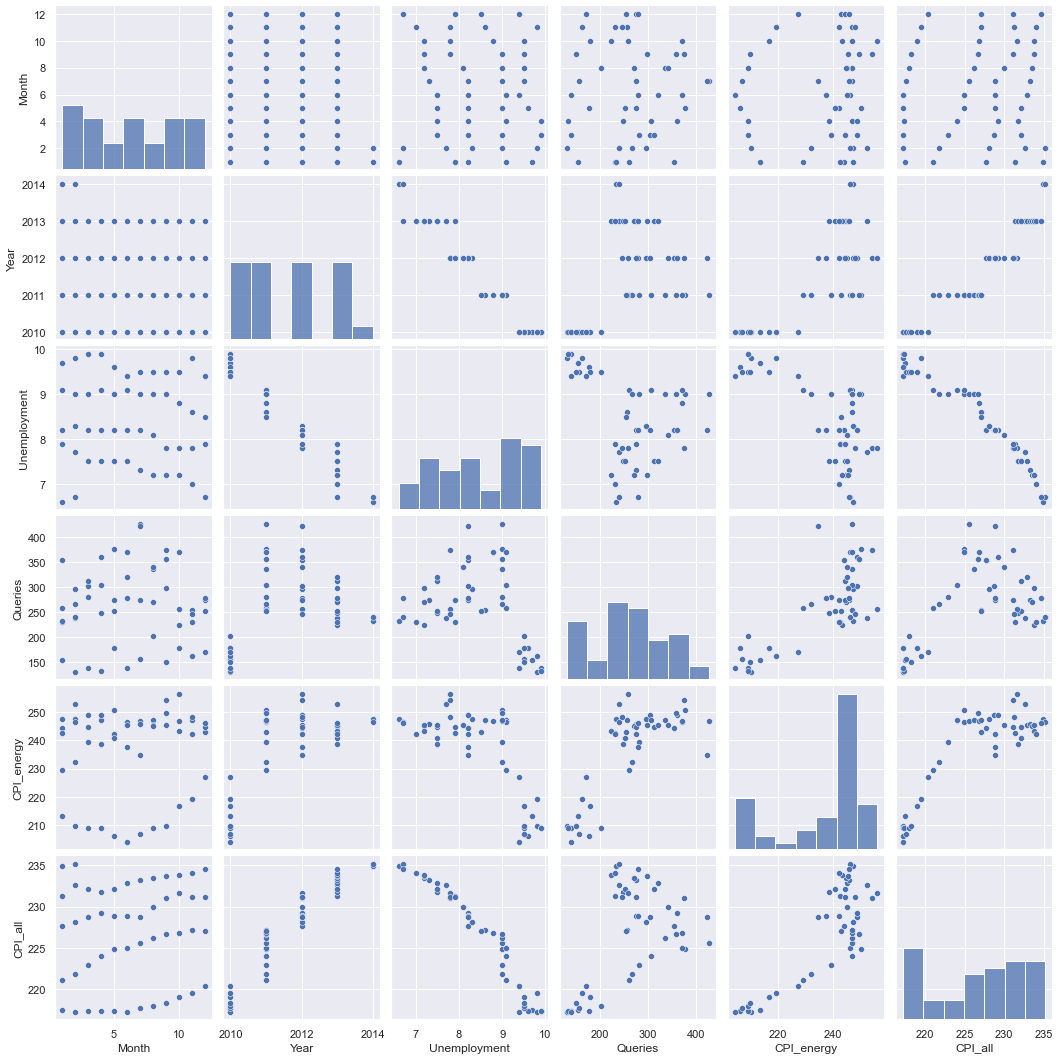

In [10]:
sns.pairplot(x)

In [11]:
x.corr()

,Month,Year,Unemployment,Queries,CPI_energy,CPI_all
Month,1.000000,-0.113547,-0.066478,0.036977,0.097092,0.114893
Year,-0.113547,1.000000,-0.972425,0.381183,0.714229,0.955978
Unemployment,-0.066478,-0.972425,1.000000,-0.349408,-0.701494,-0.963583
Queries,0.036977,0.381183,-0.349408,1.000000,0.760016,0.508056
CPI_energy,0.097092,0.714229,-0.701494,0.760016,1.000000,0.840991
CPI_all,0.114893,0.955978,-0.963583,0.508056,0.840991,1.000000


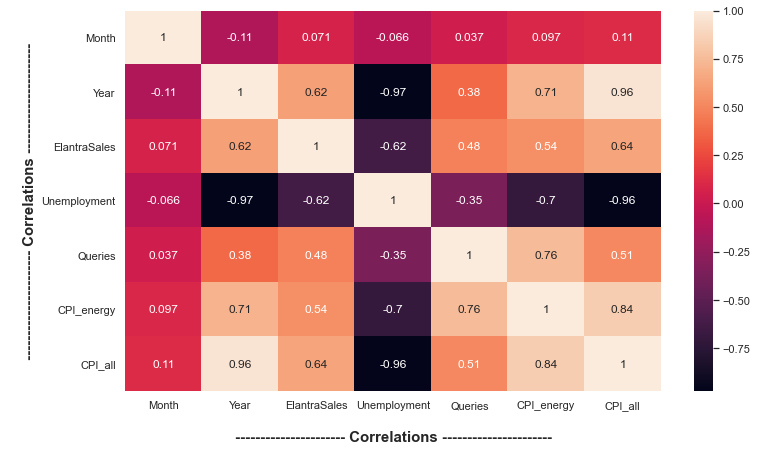

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(dataset.corr(),annot=True)
plt.xlabel("\n---------------------- Correlations ----------------------",weight="bold",fontsize=15.0)
plt.ylabel("\n---------------------- Correlations ----------------------",weight="bold",fontsize=15.0)
plt.show()

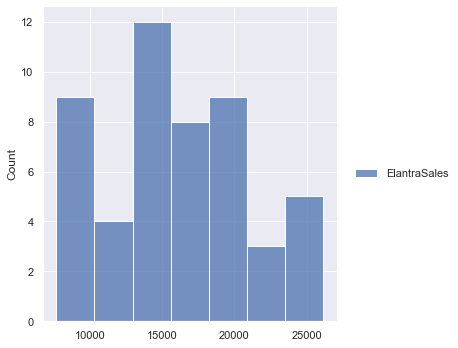

In [22]:
sns.displot(y)
plt.show() 

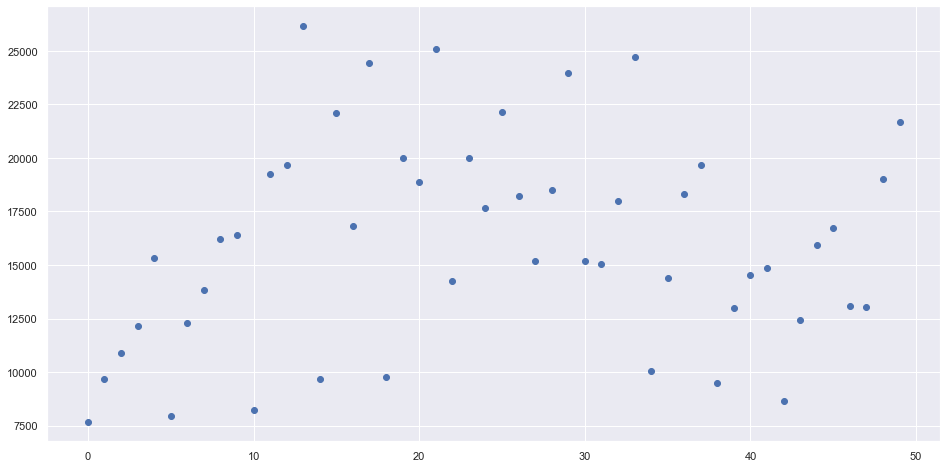

In [23]:
plt.scatter(y.index,y)

In [24]:
from sklearn import linear_model

In [25]:
lm=linear_model.LinearRegression()

In [26]:
lm.fit(x,y)

LinearRegression()

In [27]:
predict=lm.predict(x)

In [28]:
lm.score(x,y)

0.49666902640117505

In [29]:
predict=pd.DataFrame(predict)

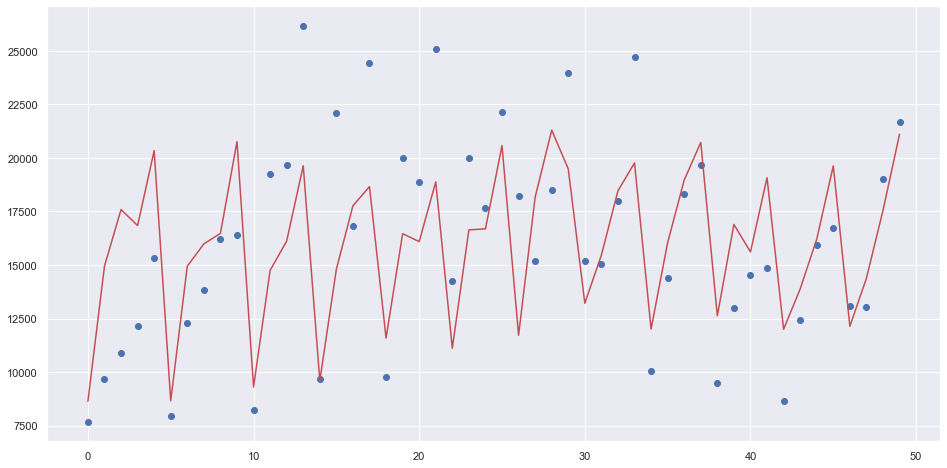

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.scatter(y.index, y ,label='Actual', color='b')
plt.plot(predict, label='Predicted', color='r')